In [1]:
import poseidon_core
import numpy as np
import matplotlib.pyplot as plt

 Platform does not have any supported GPU!
 Platform verification failed
 platform is not supported by cufile
 cuFile initialization failed


In [2]:
file_path = '/home/rmccune/Documents/poseidon/data/lidar/combined_point_cloud_down_east.laz'

min_x_extent = 847809.694
max_x_extent = 847973.874
min_y_extent = 127254.634
max_y_extent = 127450.141

grid_gen = poseidon_core.GridGenerator(file_path, min_x_extent, max_x_extent, min_y_extent, max_y_extent, lidar_units='meters')

resolution = 0.05 # meters

pts_array = grid_gen.create_point_array()
grid_x, grid_y, grid_z = grid_gen.gen_grid(resolution, pts_array, grid_descriptor='sea_level')


--- Starting grid generation for 'sea_level' at 0.05m ---
  [IO] Using existing directory: data/generated_grids
  [GRID] Generating grid coordinates...
    X Extent: 847809.69 to 847973.87
    Y Extent: 127254.63 to 127450.14
    Initial grid shape (before transpose): (3284, 3911)
  [GRID] Interpolating Z grid from 205550 input points...
    [WARN] 8834 grid points were outside the interpolation area (set to NaN).
  [GRID] Transposing grids to (Y, X) convention.
    Final grid shape: (3911, 3284)
  [IO] Saving compressed Zarr arrays (mode='w', overwriting)...
    X -> data/generated_grids/sea_level_grid_x_0.05m.zarr
    Y -> data/generated_grids/sea_level_grid_y_0.05m.zarr
    Z -> data/generated_grids/sea_level_grid_z_0.05m.zarr
--- Grid generation successful in 5.26 seconds. ---


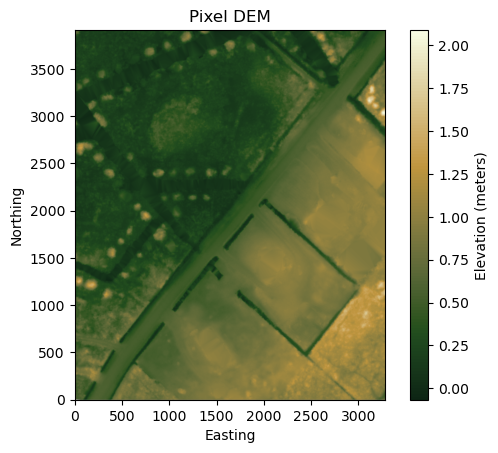

In [3]:
poseidon_core.plotting_utils.plot_elev_grid(grid_z)

In [4]:
intrinsics = np.array([3040, # number of pixel columns
                       4056, # number of pixel rows
                       1503.0136, # U component of principal point
                       2163.4301, # V component of principal point
                       2330.4972, # U component of focal length
                       2334.0017, # V component of focal length
                       -0.3587, # radial distortion 
                       0.1388, # radial distortion
                       -0.0266, # radial distortion
                       -0.0046, # tangential distortion
                       0.0003 # tangential distortion
                       ])

extrinsics = np.array([847955.4296, # camera x in world
                       127408.728, # camera y in world
                       4.4922, # camera elev in world
                       4.38504, # azimuth
                       1.14484, # tilt
                       0.01305 # roll/swing
                       ])

In [5]:
rectifier = poseidon_core.ImageRectifier(intrinsics, extrinsics, grid_x, grid_y, grid_z, use_gpu=True)

[2025-10-26 19:26:13] --- Initializing ImageRectifier ---
[2025-10-26 19:26:13]   Mode: GPU (CuPy)
[2025-10-26 19:26:13]   Input grid shape: (3911, 3284)
[2025-10-26 19:26:13]   Starting distortion map computation (Ud, Vd)...


[2025-10-26 19:26:14]   ...Distortion map computation complete.
[2025-10-26 19:26:14] --- ImageRectifier Initialization Complete ---


In [6]:
rect_im = rectifier.merge_rectify('data/CAM_DE_01_20241020151826.jpg', verbose=True)

[2025-10-26 19:26:14] Rectifying single image: data/CAM_DE_01_20241020151826.jpg


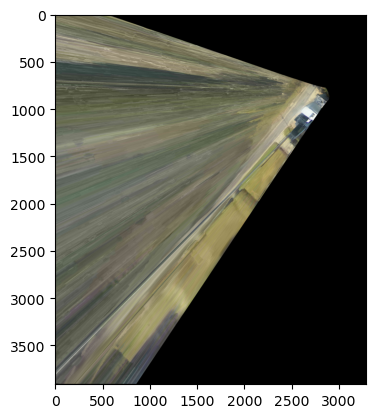

In [7]:
plt.imshow(np.flipud(rect_im.get()))

In [8]:
rectifier.merge_rectify_folder('data/DE_test_event/labels', 'data/DE_test_event/zarr/labels', labels=True)

[2025-10-26 19:26:15] 
=== Starting Batch Rectification ===
[2025-10-26 19:26:15]   Source folder: data/DE_test_event/labels
[2025-10-26 19:26:15]   Output Zarr store: data/DE_test_event/zarr/labels
[2025-10-26 19:26:15]   Found 60 images to process.
[2025-10-26 19:26:15]   Processing image 1/60: CAM_DE_01_20241005204226_predseg_labels.png
[2025-10-26 19:26:16]   Processing image 6/60: CAM_DE_01_20241005194825_predseg_labels.png
[2025-10-26 19:26:17]   Processing image 12/60: CAM_DE_01_20241005193026_predseg_labels.png
[2025-10-26 19:26:19]   Processing image 18/60: CAM_DE_01_20241005113626_predseg_labels.png
[2025-10-26 19:26:20]   Processing image 24/60: CAM_DE_01_20241005183026_predseg_labels.png
[2025-10-26 19:26:22]   Processing image 30/60: CAM_DE_01_20241005124226_predseg_labels.png
[2025-10-26 19:26:23]   Processing image 36/60: CAM_DE_01_20241005130026_predseg_labels.png
[2025-10-26 19:26:24]   Processing image 42/60: CAM_DE_01_20241005204826_predseg_labels.png
[2025-10-26 19:

In [9]:
processor = poseidon_core.DepthMapProcessor(grid_z, pond_edge_elev_plot_dir='data/DE_test_event/plots')

In [10]:
processor.process_depth_maps('data/DE_test_event/zarr/labels', 'data/DE_test_event/zarr/depth_maps')

[2025-10-26 19:26:32] 
=== Starting Depth Map Generation ===
[2025-10-26 19:26:32]   Source Zarr directory: data/DE_test_event/zarr/labels
[2025-10-26 19:26:32]   Output Zarr directory: data/DE_test_event/zarr/depth_maps
[2025-10-26 19:26:32]   Found 60 rectified label arrays to process.
[2025-10-26 19:26:32]   Processing file 1/60: CAM_DE_01_20241005132426_predseg_labels_rectified
[2025-10-26 19:26:54]   Processing file 6/60: CAM_DE_01_20241005111826_predseg_labels_rectified
[2025-10-26 19:27:17]   Processing file 12/60: CAM_DE_01_20241005201826_predseg_labels_rectified
[2025-10-26 19:27:41]   Processing file 18/60: CAM_DE_01_20241005122425_predseg_labels_rectified
[2025-10-26 19:28:04]   Processing file 24/60: CAM_DE_01_20241005113026_predseg_labels_rectified
[2025-10-26 19:28:28]   Processing file 30/60: CAM_DE_01_20241005200625_predseg_labels_rectified
[2025-10-26 19:28:54]   Processing file 36/60: CAM_DE_01_20241005201225_predseg_labels_rectified
[2025-10-26 19:29:17]   Processing

In [1]:
import poseidon_core
import numpy as np

 Platform does not have any supported GPU!
 Platform verification failed
 platform is not supported by cufile
 cuFile initialization failed


In [2]:
main_dir = 'data'

virtual_sensor_locs = np.array([[3174, 2691], [1900, 1657], [2362, 2092]])

min_x_extent = 847809.694
max_x_extent = 847973.874
min_y_extent = 127254.634
max_y_extent = 127450.141

plotter = poseidon_core.DepthMapPlotter(main_dir, min_x_extent, max_x_extent, min_y_extent, max_y_extent, bbox_crs="EPSG:32119")

 -> Processing WSE file: CAM_DE_01_20241005183625_predseg_labels_rectified_wse_map_95_perc
    -> Number of valid (non-NaN) data points: 103619
Plot created successfully and saved to data/DE_test_event/plots/WSE_maps/CAM_DE_01_20241005183625_predseg_labels_rectified_wse_map_95_perc.png.
 -> Processing DEPTH file: CAM_DE_01_20241005112426_predseg_labels_rectified_depth_map_95_perc
    -> Number of valid (non-NaN) data points: 341943
Plot created successfully and saved to data/DE_test_event/plots/depth_maps/CAM_DE_01_20241005112426_predseg_labels_rectified_depth_map_95_perc.png.
 -> Processing WSE file: CAM_DE_01_20241005113026_predseg_labels_rectified_wse_map_median
    -> Number of valid (non-NaN) data points: 298186
Plot created successfully and saved to data/DE_test_event/plots/WSE_maps/CAM_DE_01_20241005113026_predseg_labels_rectified_wse_map_median.png.
 -> Processing DEPTH file: CAM_DE_01_20241005192426_predseg_labels_rectified_depth_map_mean
    -> Number of valid (non-NaN) data 

KeyboardInterrupt: 

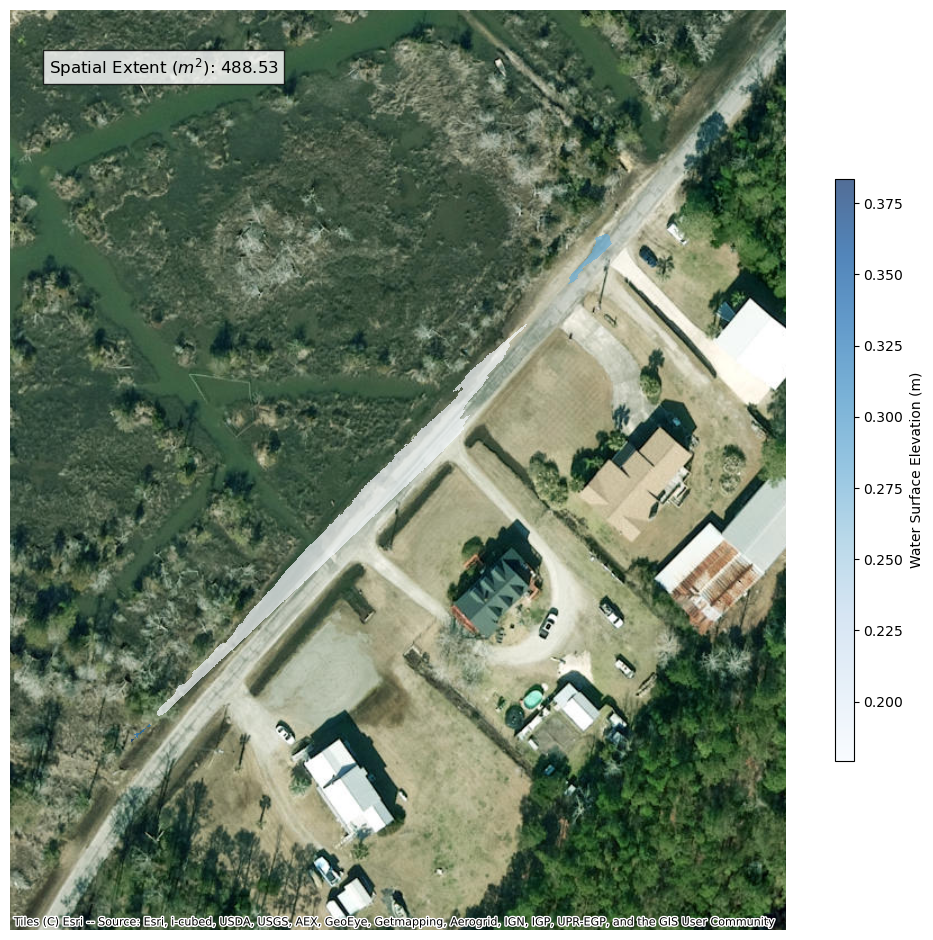

In [3]:
plotter.process_single_flood_event('DE_test_event')